# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [5]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

#this class is responsible for the cart object and actions of that cart
class Cart():
    
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        newItem = input("What do you want to buy?: ")
        quantity = int(input(f"How many {newItem}(s) would you like?(Insert Number): "))
        if newItem not in self.items.key():
            self.items[newItem] = quantity
        else:
            self.items[newItem] += quantity
        print(f"{quantity} {newItem}(s) have been added")
        
    def remove(self):
        clear()
        discard = input("What would you like to toss?: ")
        quantity = int(input("How many would like to toss?(Insert Number): "))
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
        except:
            print(f"{discard} was not in the cart")
        self.show()
        
    def show(self):
        print("Your cart has the listed items and quantities")
        print("Items --- Quantity")
        for item, quantity in self.items.items():
            print(f"{item} --- {quantity}")
            
    def checkout(self):
        clear()
        if self.items:
            print("Thanks for shopping")
            self.show()
        else:
            print("Goodbye, please purchase something next time.")
            
#control the logic and flow of our program
class Main:
    
    def showInstructions(self):
        print("""
        Welcome to the Online Shopping Program.
        Options:
        [1] Show Current Cart
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
        
#driver code
    
    def run(self):
        myCart = Cart()
        
        while True:
            self.showInstructions()
            choice = input("What would you like to do?: ")
            if choice == "1":
                if myCart.items:
                    myCart.show()
                else:
                    print("Your cart is empty... Start shopping")
            elif choice == "2":
                myCart.add()
            elif choice == "3":
                if myCart.items:
                    myCart.remove()
                else:
                    print("Your cart is empty... You can't remove what isn't there")
            elif choice == "4":
                myCart.checkout()
                break
            else:
                print("Invalid response... please try again")
                
myProgram = Main()
myProgram.run()

KeyboardInterrupt: Interrupted by user

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [9]:
# making an API call
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/haunter")
if r.status_code == 200:
    data = r.json()
    
print(data.keys())


dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [11]:
# get the name
name = data['name']
print(name)

haunter


In [15]:
# get types

# types = data['types'][0]['type']['name']
types = [pokemonType["type"]["name"] for pokemonType in data['types']]
print(types)

['ghost', 'poison']


In [20]:
# get weight
weight = data['weight']
print(weight)

1


In [25]:
# get abilities
abilities = [pokemonAbilities["ability"]["name"] for pokemonAbilities in data["abilities"]]
print(abilities)

['levitate']


In [26]:
# Create a structure for a single pokemon
haunter = {
    "name": name,
    "abilities" : abilities,
    "weight" : weight,
    "types" : types
}

In [27]:
haunter

{'name': 'haunter',
 'abilities': ['levitate'],
 'weight': 1,
 'types': ['ghost', 'poison']}

#### Create a function to Pull in your own Pokemon's data 

In [40]:
def poke_api_call(pokemon):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if r.status_code == 200:
        data = r.json()
    name = data['name']
    types = [pokemonType["type"]["name"] for pokemonType in data['types']]
    weight = data['weight']
    abilities = [pokemonAbilities["ability"]["name"] for pokemonAbilities in data["abilities"]]
    pokemon = {
        "Name": name.title(),
        "Abilities" : abilities,
        "Weight" : weight,
        "Types" : types
}
    return pokemon
    
poke_api_call("gallade")

{'Name': 'Gallade',
 'Abilities': ['steadfast', 'justified'],
 'Weight': 520,
 'Types': ['psychic', 'fighting']}

Choose your pokemon

In [42]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['gallade', 'milotic','scizor','chandelure','wigglytuff','goodra']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [43]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for member in your_team:
    pokemonMember = poke_api_call(member)
    my_six_pokemon[pokemonMember["Name"].title()] = pokemonMember
    
my_six_pokemon

{'Gallade': {'Name': 'Gallade',
  'Abilities': ['steadfast', 'justified'],
  'Weight': 520,
  'Types': ['psychic', 'fighting']},
 'Milotic': {'Name': 'Milotic',
  'Abilities': ['marvel-scale', 'competitive', 'cute-charm'],
  'Weight': 1620,
  'Types': ['water']},
 'Scizor': {'Name': 'Scizor',
  'Abilities': ['swarm', 'technician', 'light-metal'],
  'Weight': 1180,
  'Types': ['bug', 'steel']},
 'Chandelure': {'Name': 'Chandelure',
  'Abilities': ['flash-fire', 'flame-body', 'infiltrator'],
  'Weight': 343,
  'Types': ['ghost', 'fire']},
 'Wigglytuff': {'Name': 'Wigglytuff',
  'Abilities': ['cute-charm', 'competitive', 'frisk'],
  'Weight': 120,
  'Types': ['normal', 'fairy']},
 'Goodra': {'Name': 'Goodra',
  'Abilities': ['sap-sipper', 'hydration', 'gooey'],
  'Weight': 1505,
  'Types': ['dragon']}}

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [57]:
class Pokemon():
    
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Ran into an issue {r.status_code}")
            return 
        self.name = pokemon["name"]
        self.types = [poke["type"]["name"] for poke in pokemon["types"]]
        self.abilities = [poke["ability"]["name"] for poke in pokemon["abilities"]]
        self.weight = pokemon["weight"]
        print(f"{self.name}'s data has been updated!")
        
    def __repr__(self):
        return f"You caught a {self.name}"
    
# class Pokemon():
    
#     def __init__(self,name):
#         self.name = name
#         self.types = []
#         self.abilities = []
#         self.weight = None
#         self.poke_api_call()
        
#     def poke_api_call(self):
#         r = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
#         if r.status_code == 200:
#             pokemon = r.json()
#         else:
#             print(f"Ran into an issue {r.status_code}")
#             return
#         self.name = pokemon['name']
#         self.types = [ poke['type']['name'] for poke in pokemon['types'] ]
#         self.abilities = [ poke['ability']['name'] for poke in pokemon['abilities'] ]
#         self.weight = pokemon['weight']
#         print(f"{self.name}'s data has been updated!")
        
#     def __repr__(self):
#         return f"You caught a {self.name}"

### Let's Catch some Pokemon

In [58]:
pikachu = Pokemon("pikachu")
print(pikachu.__dict__)

pikachu's data has been updated!
{'name': 'pikachu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 60}


In [14]:
pokedex = {}


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

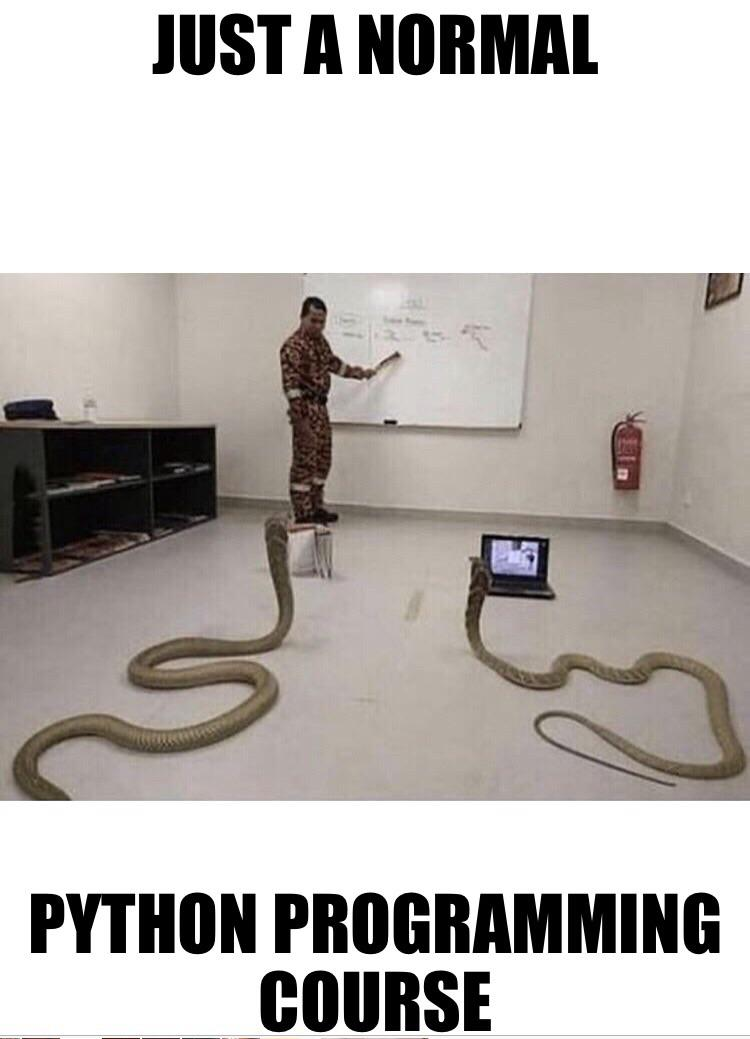

In [59]:
# Display an image in Jupyter notebook
from IPython.display import Image

display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


Wigglytuff #72's data has been updated!
{'name': 'wigglytuff', 'types': ['normal', 'fairy'], 'abilities': ['cute-charm', 'competitive', 'frisk'], 'weight': 120, 'number': 72, 'image': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/40.png'}


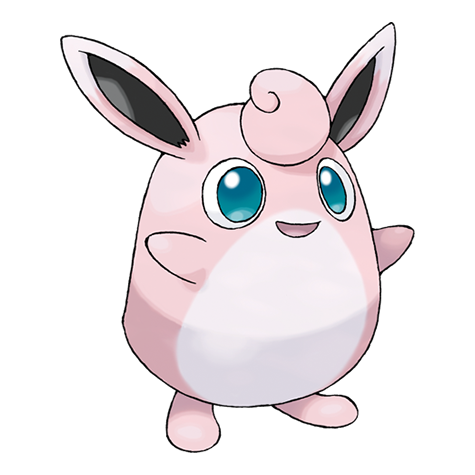

In [163]:
# recreate your pokemon class here
from IPython.display import Image
from random import randint

class Pokemon(Evolver, Move_Tutor):
    
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.number = None
        self.image = None
        self.poke_api_call()
#         self.display = display(Image( f"https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/{self.number}.png"))
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Ran into an issue {r.status_code}")
            return 
        self.name = pokemon["name"]
        self.types = [poke["type"]["name"] for poke in pokemon["types"]]
        self.abilities = [poke["ability"]["name"] for poke in pokemon["abilities"]]
        self.weight = pokemon["weight"]
        self.number = pokemon["order"]
        self.image = pokemon["sprites"]["other"]["official-artwork"]["front_default"]
        print(f"{self.name.title()} #{self.number}'s data has been updated!")
        
    def __repr__(self):
        return f"You caught a {self.name.title()}"
    
    def display(self):
        display(Image(self.image))
        
        
        
wigglytuff = Pokemon("wigglytuff")
print(wigglytuff.__dict__)
wigglytuff.display()

# class Pokemon():
    
#     def __init__(self, name):
#         self.name = name
#         self.types = []
#         self.abilities = []
#         self.weight = None
#         self.poke_api_call()
#         self.number = randint(1,898)
#         self.display = display(Image( f"https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/{self.number}.png"))
        
#     def poke_api_call(self):
#         r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species//")
#         if r.status_code == 200:
#             pokemon = r.json()
#         else:
#             print(f"Ran into an issue {r.status_code}")
#             return 
#         self.name = pokemon["name"]
#         self.types = [poke["type"]["name"] for poke in pokemon["types"]]
#         self.abilities = [poke["ability"]["name"] for poke in pokemon["abilities"]]
#         self.weight = pokemon["weight"]
#         print(f"{self.name.title()}'s data has been updated!")
        
#     def __repr__(self):
#         return f"You caught a {self.name.title()}"
    
        
        
# gallade = Pokemon("gallade")
# print(gallade.__dict__)

In [18]:
# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [129]:
from time import sleep

class Evolver:
    
    def evolve(self):
        # API call for pokemon's species
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f'Ran into an issue {r.status_code}')
            return
        
        #API call for species evolutionary chain
        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f"Ran into an issue {r.status_code}")
            return
        
        #get base name
        base_name = ev_chain["species"]["name"]
        
        evolution = ev_chain["evolves_to"][0]
        evolution_name = evolution["species"]["name"]
        
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution["evolves_to"][0]["species"]["name"]
        else:
            print(f"You can't evolve {self.name} again.")
            return
            
        print(".....")
        sleep(1)
        print(f"Your {self.name} is evolving?!?!")
        self.display()
        sleep(1)
        print(".....")
        self.name = evolution_name
        self.poke_api_call()
        self.display()
        print(f"Congrats you've got a new {self.name.title()}")
        

Now let's evolve a few

Gible #568's data has been updated!
.....
Your gible is evolving?!?!


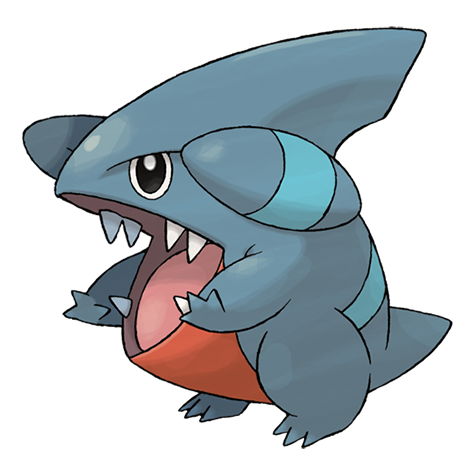

.....
Gabite #569's data has been updated!


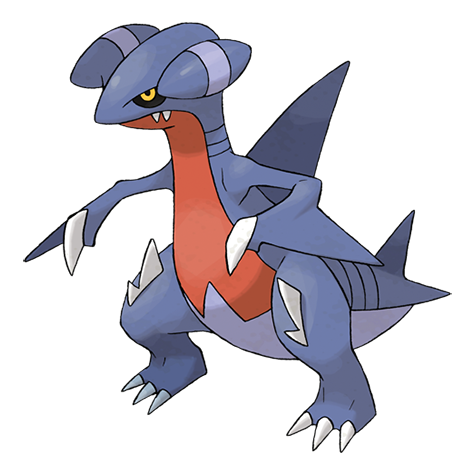

Congrats you've got a new gabite


In [138]:
gible = Pokemon("gible")
gible.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [216]:
from IPython.display import Image

class Move_Tutor:
    
    def __init__(self):
        self.move_list = []
        self.name = name
        self.teach_move()
        self.show_moves()
        
    def teach_move(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            pokemon = r.json()
            moves = rjson()
            moves_list = moves["name"]
            poke_dict = {"name" : moves}
            return poke_dict
        else:
            print(f"Ran into an issue {r.status_code}")
            return 
        self.name = pokemon["name"]
        self.move_list = pokemon["moves"]
        prompt = input(f"Would you like to teach a new move to {self.name}?: Type Yes [Y], Show Moves [S] or No [N]")
        if prompt.upper() == "Y":
            teach_new_move = input("Which move?: ")
            move = self.teach_move(teach_new_move)
            poke_dict.append(move)
        elif prompt.upper() == "S":
            self.show_move()
        elif prompt.upper() == "N":
            print("Goodbye")
        else:
            print("Invalid Response")  
                       
    def show_moves(self):
        print(f"{self.name.title}'s moves: ")
        print(poke_dict)
#         self.move_list
                       
        

In [220]:
# for i in range(5):
#     charmander.teach_move()

# charmander.move_list[0]

# gallade.teach_move()
pikachu = Pokemon("pikachu")
# gallade.teach_move()
# gallade.move_list[0]
# gallade.show_moves()

Pikachu #35's data has been updated!


In [223]:
pikachu.teach_move()


Would you like to teach a new move to pikachu?: Type Yes [Y], Show Moves [S] or No [N]y
Which move?: Slam


In [224]:
pikachu.show_moves()

pikachu's moves: 
[{'move': {'name': 'mega-punch', 'url': 'https://pokeapi.co/api/v2/move/5/'}, 'version_group_details': [{'level_learned_at': 0, 'move_learn_method': {'name': 'machine', 'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'}, 'version_group': {'name': 'red-blue', 'url': 'https://pokeapi.co/api/v2/version-group/1/'}}, {'level_learned_at': 0, 'move_learn_method': {'name': 'machine', 'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'}, 'version_group': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version-group/2/'}}, {'level_learned_at': 0, 'move_learn_method': {'name': 'tutor', 'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'}, 'version_group': {'name': 'emerald', 'url': 'https://pokeapi.co/api/v2/version-group/6/'}}, {'level_learned_at': 0, 'move_learn_method': {'name': 'tutor', 'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'}, 'version_group': {'name': 'firered-leafgreen', 'url': 'https://pokeapi.co/api/v2/version-group/7/'}}, {'level_lear